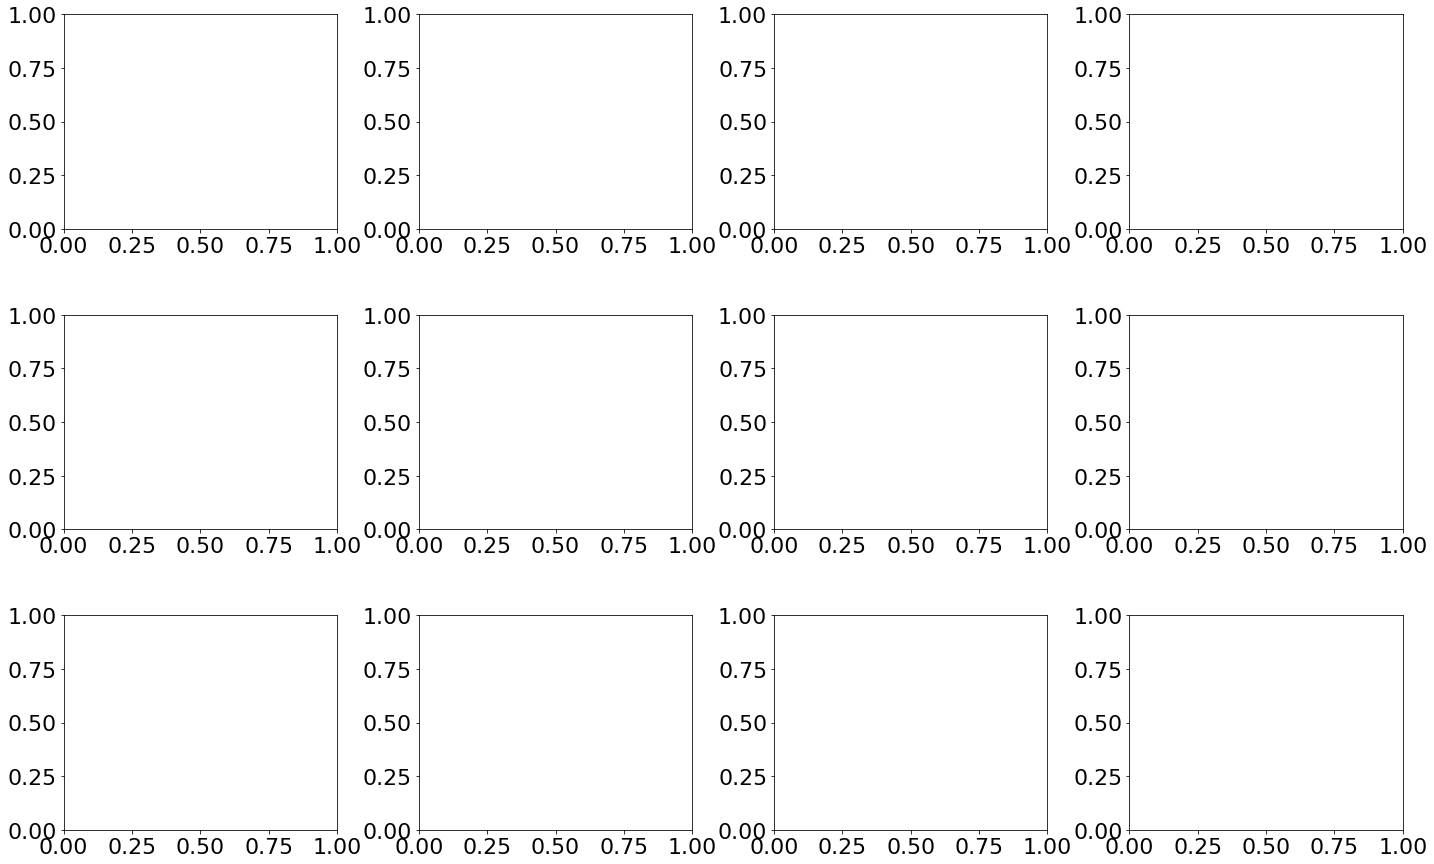

In [55]:
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

import csv

fig, axs = plt.subplots(3, 4, figsize=(24, 15))

plt.subplots_adjust(hspace=0.4)
plt.subplots_adjust(wspace = 0.3)

fontsize=16

linewidth=2.0

labelsize=14

markersize = 50


In [56]:

def plot_stuff(slice_number, x, y):

    # Initialize dictionaries to store the mapping between values and indices
    bdp_value_to_index = {}
    flow_value_to_index = {}

    # Initialize a dictionary to store the bits_per_second values for each combination of N_bdp and flow
    throughput_values = {}

    # Initialize sets to store the unique values of N_bdp and flow
    unique_bdp_values = set()
    unique_flow_values = set()

    # Open the CSV file and read in the data
    with open('slice_{slice_no}_results/bbr_results.csv'.format(slice_no=slice_number), 'r') as f:
        reader = csv.reader(f)
        # Skip the header row
        next(reader)
        # Iterate through the rows of the file
        for row in reader:
            N_bdp = float(row[0])
            flow = int(row[1])
            bits_per_second = float(row[3])
            # Add the values to the sets
            unique_bdp_values.add(N_bdp)
            unique_flow_values.add(flow)
            # Store the bits_per_second value in the dictionary
            key = (N_bdp, flow)
            if key not in throughput_values:
                throughput_values[key] = []
            throughput_values[key].append(bits_per_second)

    # Convert the sets to lists and sort them
    unique_bdp_values = sorted(list(unique_bdp_values))
    unique_flow_values = sorted(list(unique_flow_values))

    # Create the dictionaries that map values to indices
    for i, value in enumerate(unique_bdp_values):
        bdp_value_to_index[value] = i
    for i, value in enumerate(unique_flow_values):
        flow_value_to_index[value] = i

    # Initialize the array with zeros
    num_bdp_values = len(unique_bdp_values)
    num_flow_values = len(unique_flow_values)
    per_flow_throughput_bbr = np.zeros((num_bdp_values, num_flow_values))

    # Iterate through the keys in the throughput_values dictionary
    for key in throughput_values:
        # Look up the indices for the values of N_bdp and flow
        N_bdp, flow = key
        N_bdp_index = bdp_value_to_index[N_bdp]
        flow_index = flow_value_to_index[flow]
        # Compute the average throughput value
        avg_throughput = np.mean(throughput_values[key])
        # Store the average throughput value in the array
        per_flow_throughput_bbr[N_bdp_index, flow_index] = avg_throughput



    # Find the index of the flow value corresponding to flow=0
    flow_index = unique_flow_values.index(0)

    # Delete the entries corresponding to the flow index that corresponds to flow=0
    per_flow_throughput_bbr = np.delete(per_flow_throughput_bbr, flow_index, axis=1)

    # Delete flow=0 from the unique_flow_values list
    unique_flow_values = unique_flow_values[:flow_index] + unique_flow_values[flow_index+1:]


    # Divide the remaining entries by the corresponding flow number
    per_flow_throughput_bbr = per_flow_throughput_bbr / unique_flow_values

    per_flow_throughput_bbr = per_flow_throughput_bbr / 1000000



    ## process Cubic results

    # Initialize dictionaries to store the mapping between values and indices
    bdp_value_to_index = {}
    flow_value_to_index = {}

    # Initialize a dictionary to store the bits_per_second values for each combination of N_bdp and flow
    throughput_values = {}

    # Initialize sets to store the unique values of N_bdp and flow
    unique_bdp_values = set()
    unique_flow_values = set()

    # Open the CSV file and read in the data
    with open('slice_{slice_no}_results/cubic_results.csv'.format(slice_no=slice_number), 'r') as f:
        reader = csv.reader(f)
        # Skip the header row
        next(reader)
        # Iterate through the rows of the file
        for row in reader:
            N_bdp = float(row[0])
            flow = int(row[1])
            bits_per_second = float(row[3])
            # Add the values to the sets
            unique_bdp_values.add(N_bdp)
            unique_flow_values.add(flow)
            # Store the bits_per_second value in the dictionary
            key = (N_bdp, flow)
            if key not in throughput_values:
                throughput_values[key] = []
            throughput_values[key].append(bits_per_second)

    # Convert the sets to lists and sort them
    unique_bdp_values = sorted(list(unique_bdp_values))
    unique_flow_values = sorted(list(unique_flow_values))

    # Create the dictionaries that map values to indices
    for i, value in enumerate(unique_bdp_values):
        bdp_value_to_index[value] = i
    for i, value in enumerate(unique_flow_values):
        flow_value_to_index[value] = i

    # Initialize the array with zeros
    num_bdp_values = len(unique_bdp_values)
    num_flow_values = len(unique_flow_values)
    per_flow_throughput_cubic = np.zeros((num_bdp_values, num_flow_values))

    # Iterate through the keys in the throughput_values dictionary
    for key in throughput_values:
        # Look up the indices for the values of N_bdp and flow
        N_bdp, flow = key
        N_bdp_index = bdp_value_to_index[N_bdp]
        flow_index = flow_value_to_index[flow]
        # Compute the average throughput value
        avg_throughput = np.mean(throughput_values[key])
        # Store the average throughput value in the array
        per_flow_throughput_cubic[N_bdp_index, flow_index] = avg_throughput


    # Find the index of the flow value corresponding to flow=0
    flow_index = unique_flow_values.index(50)

    # Delete the entries corresponding to the flow index that corresponds to flow=0
    per_flow_throughput_cubic = np.delete(per_flow_throughput_cubic, flow_index, axis=1)

    # Delete flow=0 from the unique_flow_values list
    unique_flow_values = unique_flow_values[:flow_index] + unique_flow_values[flow_index+1:]

    new_list = [50 - x for x in unique_flow_values]


    # Divide the remaining entries by the corresponding flow number
    per_flow_throughput_cubic = per_flow_throughput_cubic / new_list


    per_flow_throughput_cubic = per_flow_throughput_cubic / 1000000





    n_flows = 50;

    print(unique_bdp_values)

    for i, n_bdp in enumerate(unique_bdp_values):

        nash_equilibrium_found = False

        for j, flow in enumerate(unique_flow_values):

            bbr_index = j-1

            cubic_index = j

            num_bbr = j

            num_cubic = n_flows - j

            prev_cubic_index = j-1

            next_bbr_index = j

            if not per_flow_throughput_bbr[i][bbr_index] < per_flow_throughput_cubic[i][prev_cubic_index]:

                if not per_flow_throughput_cubic[i][cubic_index] < per_flow_throughput_bbr[i][next_bbr_index]:

                    if nash_equilibrium_found == False:
                        nash_equilibrium_found = True

                    #print("Nash equilibrium")

                    #print("Buffer = {n_bdp}BDP, num_bbr = {num_bbr}, num_cubic ={num_cubic}".format(n_bdp=n_bdp, num_bbr = num_bbr, num_cubic =num_cubic, ))

                    axs[x,y].scatter(n_bdp, num_cubic, marker='s', facecolors='none',edgecolors='red', s=markersize, clip_on=False, linewidth=linewidth)
        if nash_equilibrium_found == False:

            
            axs[x,y].scatter(n_bdp, 0, marker='s', facecolors='none',edgecolors='red', s=markersize, clip_on=False, linewidth=linewidth)


    axs[x,y].set_xticks([0, 10, 20, 30, 40, 50])
    axs[x,y].set_yticks([0, 10, 20, 30, 40, 50])
    axs[x,y].set_ylabel("# of CUBIC flows at the NE", fontsize=fontsize)
    axs[x,y].set_xlabel("Buffer size in BDP", fontsize=fontsize)
    axs[x,y].grid()
    axs[x,y].set_ylim([0, 50])
    


In [57]:
plot_stuff(1,0,0)
plot_stuff(2,0,1)
plot_stuff(3,0,2)
plot_stuff(4,0,3)
plot_stuff(5,1,0)
plot_stuff(6,1,1)
plot_stuff(7,1,2)
plot_stuff(8,1,3)
plot_stuff(9,2,0)
plot_stuff(10,2,1)
plot_stuff(11,2,2)
plot_stuff(12,2,3)

[0.5, 5.0, 10.0, 20.0, 30.0, 40.0, 50.0]
[0.5, 5.0, 10.0, 20.0, 30.0, 40.0, 50.0]
[0.5, 5.0, 10.0, 20.0, 30.0, 40.0, 50.0]
[0.5, 5.0, 10.0, 20.0, 30.0, 40.0, 50.0]
[0.5, 5.0, 10.0, 20.0, 30.0, 40.0, 50.0]
[0.5, 5.0, 10.0, 20.0, 30.0, 40.0, 50.0]
[0.5, 5.0, 10.0, 20.0, 30.0, 40.0, 50.0]
[0.5, 5.0, 10.0, 20.0, 30.0, 40.0, 50.0]
[0.5, 5.0, 10.0, 20.0, 30.0, 40.0, 50.0]
[0.5, 5.0, 10.0, 20.0, 30.0, 40.0, 50.0]
[0.5, 5.0, 10.0, 20.0, 30.0, 40.0, 50.0]
[0.5, 5.0, 10.0, 20.0, 30.0, 40.0, 50.0]


In [58]:
y=-0.3
axs[0,0].set_title('50 Mbps, 5ms RTT', y=y, fontsize=fontsize)
axs[0,1].set_title('50 Mbps, 20ms RTT', y=y, fontsize=fontsize)
axs[0,2].set_title('50 Mbps, 40ms RTT', y=y, fontsize=fontsize)
axs[0,3].set_title('50 Mbps, 80ms RTT', y=y, fontsize=fontsize)
axs[1,0].set_title('100 Mbps, 5ms RTT', y=y, fontsize=fontsize)
axs[1,1].set_title('100 Mbps, 20ms RTT', y=y, fontsize=fontsize)
axs[1,2].set_title('100 Mbps, 40ms RTT', y=y, fontsize=fontsize)
axs[1,3].set_title('100 Mbps, 80ms RTT', y=y, fontsize=fontsize)
axs[2,0].set_title('500 Mbps, 5ms RTT', y=y, fontsize=fontsize)
axs[2,1].set_title('500 Mbps, 20ms RTT', y=y, fontsize=fontsize)
axs[2,2].set_title('500 Mbps, 40ms RTT', y=y, fontsize=fontsize)
axs[2,3].set_title('500 Mbps, 80ms RTT', y=y, fontsize=fontsize)





Text(0.5, -0.3, '500 Mbps, 80ms RTT')

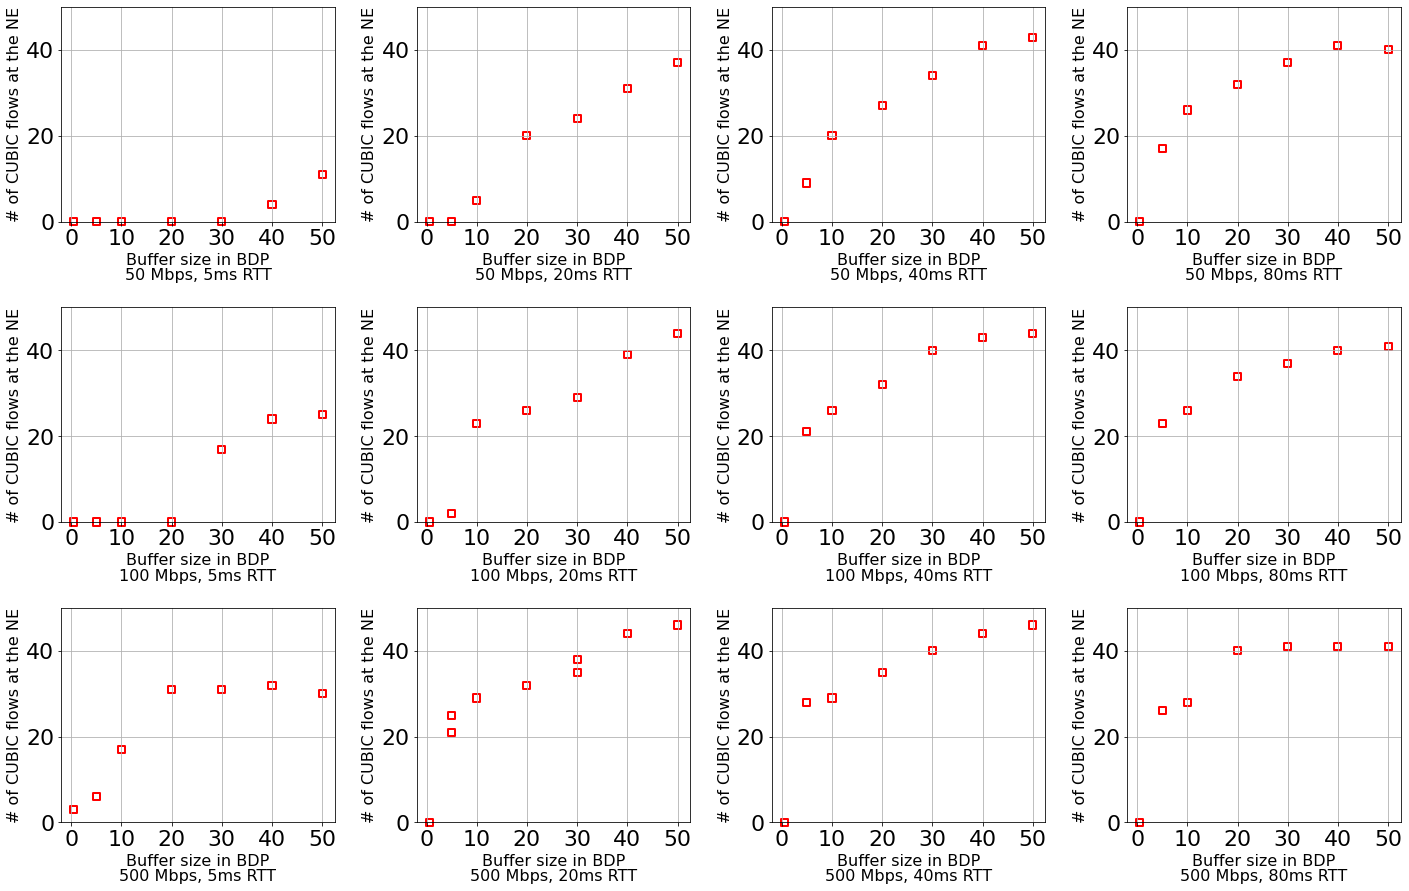

In [59]:

from IPython.display import display
display(fig)

In [6]:
fig.savefig('figure_9.pdf')